In [1]:
from scipy.spatial import HalfspaceIntersection
import numpy as np
import matplotlib.pyplot as plt

In [6]:
halfspaces = np.array([[1, 0., 0.],
                       [0., 1., 0.],
                       [-2., -1., 4.],
                       [0.5, -1., 2.]])
feasible_point = np.array([0., 0.])
hs = HalfspaceIntersection(halfspaces, feasible_point)

ValueError: Feasible point must be a (ndim-1,) array

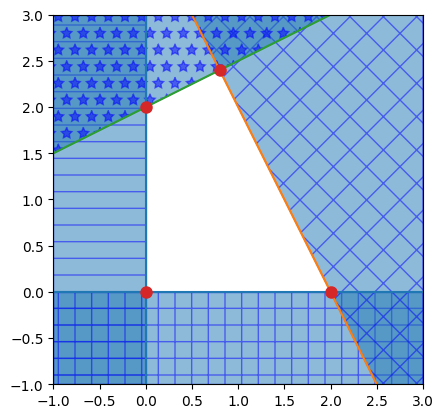

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
xlim, ylim = (-1, 3), (-1, 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
x = np.linspace(-1, 3, 100)
symbols = ['-', '+', 'x', '*']
signs = [0, 0, -1, -1]
fmt = {"color": None, "edgecolor": "b", "alpha": 0.5}
for h, sym, sign in zip(halfspaces, symbols, signs):
    hlist = h.tolist()
    fmt["hatch"] = sym
    if h[1]== 0:
        ax.axvline(-h[2]/h[0], label='{}x+{}y+{}=0'.format(*hlist))
        xi = np.linspace(xlim[sign], -h[2]/h[0], 100)
        ax.fill_between(xi, ylim[0], ylim[1], **fmt)
    else:
        ax.plot(x, (-h[2]-h[0]*x)/h[1], label='{}x+{}y+{}=0'.format(*hlist))
        ax.fill_between(x, (-h[2]-h[0]*x)/h[1], ylim[sign], **fmt)
x, y = zip(*hs.intersections)
ax.plot(x, y, 'o', markersize=8)

In [2]:
from my_longformer import LongformerForSequenceClassification

In [3]:
model = LongformerForSequenceClassification.from_pretrained("/uufs/chpc.utah.edu/common/home/u1419542/scratch/FineGrainedRLHF/original_models/baseline_rm", cache_dir="/scratch/general/vast/u1419542/huggingface_cache")

In [6]:
model.classifier

LongformerClassificationHead(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (out_proj): Linear(in_features=768, out_features=1, bias=True)
)

In [15]:
for p in model.classifier.parameters():
    print(p.data.shape)

torch.Size([768, 768])
torch.Size([768])
torch.Size([1, 768])
torch.Size([1])


In [6]:
from transformers import AutoTokenizer 

In [7]:
tokenizer = AutoTokenizer.from_pretrained("allenai/longformer-base-4096", cache_dir="/scratch/general/vast/u1419542/huggingface_cache")

In [8]:
input = tokenizer("Hello, how are you?")

In [9]:
input

{'input_ids': [0, 31414, 6, 141, 32, 47, 116, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
output = model(input)

AttributeError: 

In [1]:
from scipy.optimize import LinearConstraint

In [6]:
from transformers import AutoTokenizer

In [3]:
lc = LinearConstraint([[1, 1],[1, -1]])

In [7]:
from my_longformer import LongformerModel

In [8]:
model = LongformerModel.from_pretrained(
    "allenai/longformer-base-4096",
    cache_dir="/scratch/general/vast/u1419542/huggingface_cache",
)

Some weights of the model checkpoint at allenai/longformer-base-4096 were not used when initializing LongformerModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing LongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
tokenizer = AutoTokenizer.from_pretrained("allenai/longformer-base-4096", cache_dir="/scratch/general/vast/u1419542/huggingface_cache")

In [10]:
inp = tokenizer.encode("Hello, how are you?", return_tensors="pt")

In [11]:
output = model(
    inp, 
    # return_dict=True,
    # output_hidden_states=True,
)

In [14]:
output["last_hidden_state"].shape

torch.Size([1, 8, 768])

In [37]:
inp

tensor([[    0, 31414,     6,   141,    32,    47,   116,     2]])

In [46]:
model 

LongformerModel(
  (embeddings): LongformerEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(4098, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): LongformerEncoder(
    (layer): ModuleList(
      (0): LongformerLayer(
        (attention): LongformerAttention(
          (self): LongformerSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (query_global): Linear(in_features=768, out_features=768, bias=True)
            (key_global): Linear(in_features=768, out_features=768, bias=True)
            (value_global): Linear(in_features=768, out_features=768, bias=True)
          )
          (o

In [16]:
from scipy.optimize import LinearConstraint, minimize
import torch
import pickle as pkl
import numpy as np

In [2]:
with open("features.pkl", "rb") as f: 
    features = pkl.load(f)

In [3]:
def objFunc(x, *args):
    return x.dot(args[0])

In [21]:
m = minimize(
    fun=objFunc,
    x0=torch.rand(features[0].shape),
    constraints=LinearConstraint(
        A=-np.delete(features, 1, 0),
        lb=-torch.inf,
        ub=0,
    ),
    args=(features[1], )
)

In [22]:
m

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.506887938323129e-13
       x: [-8.505e-12 -1.926e-11 ... -1.619e-11 -1.350e-11]
     nit: 2
     jac: [-7.050e-04  2.121e-03 ...  1.108e-03  2.258e-03]
    nfev: 1538
    njev: 2

In [23]:
m.x.dot(features[1])

1.506887938323129e-13

In [6]:
m

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.2371834952715282e-13
       x: [-2.823e-12  3.197e-11 ...  5.581e-12  6.518e-12]
     nit: 2
     jac: [ 3.250e-03  2.199e-03 ...  4.437e-03 -2.022e-03]
    nfev: 1538
    njev: 2

In [7]:
m.x.dot(features[0])

-2.2371834952715282e-13

In [8]:
a = torch.rand((3,4))

In [14]:
a

tensor([[0.2610, 0.6143, 0.0105, 0.5647],
        [0.2305, 0.3573, 0.0833, 0.3050],
        [0.5308, 0.9698, 0.6763, 0.1339]])

In [13]:
a[[0, 2],:]

tensor([[0.2610, 0.6143, 0.0105, 0.5647],
        [0.5308, 0.9698, 0.6763, 0.1339]])

In [20]:
np.delete(a, 1, 0)

tensor([[0.2610, 0.6143, 0.0105, 0.5647],
        [0.5308, 0.9698, 0.6763, 0.1339]])

In [18]:
a

tensor([[0.2610, 0.6143, 0.0105, 0.5647],
        [0.2305, 0.3573, 0.0833, 0.3050],
        [0.5308, 0.9698, 0.6763, 0.1339]])

In [26]:
np.isclose(-2.2371834952715282e-13, 0)

True

In [1]:
import pickle as pkl

In [7]:
with open("redundant.pkl", "rb") as f:
    redundant = pkl.load(f)

with open("non_redundant.pkl", "rb") as f:
    non_redundant = pkl.load(f)

with open("failure.pkl", "rb") as f:
    failure = pkl.load(f)

In [8]:
N = len(redundant) + len(non_redundant)

In [12]:
print("Redundant: {:0.2f}%".format((len(redundant)/N)*100))

Redundant: 18.31%


In [13]:
print("Non-Redundant: {:0.2f}%".format((len(non_redundant)/N)*100))

Non-Redundant: 81.69%


In [14]:
print("Failure: {:0.2f}%".format((len(failure)/N)*100))

Failure: 22.48%


In [2]:
with open("redundant_factuality.pkl", "rb") as f:
    redundant_factuality = pkl.load(f)

with open("non_redundant_factuality.pkl", "rb") as f:
    non_redundant_factuality = pkl.load(f)

with open("failure_factuality.pkl", "rb") as f:
    failure_factuality = pkl.load(f)

In [18]:
N_factuality = len(redundant_factuality) + len(non_redundant_factuality)

In [19]:
print("Redundant (Factuality): {:0.2f}%".format((len(redundant_factuality)/N_factuality)*100))

Redundant (Factuality): 1.23%


In [20]:
print("Non-Redundant (Factuality): {:0.2f}%".format((len(non_redundant_factuality)/N_factuality)*100))

Non-Redundant (Factuality): 98.77%


In [21]:
print("Failure (Factuality): {:0.2f}%".format((len(failure_factuality)/N_factuality)*100))

Failure (Factuality): 87.47%


In [2]:
from datasets import load_dataset

/uufs/chpc.utah.edu/common/home/u1419542/scratch/miniconda3/envs/fgrlhfEnv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
ds = load_dataset("Owishiboo/grammar-correction", split="train")

In [24]:
ds = ds.shuffle()

In [25]:
ds = ds.train_test_split(test_size=0.3)
train = ds["train"]
val = ds["test"]

In [26]:
import pandas as pd 
trainDF = pd.DataFrame.from_records(train)

In [29]:
len(trainDF)

4202

In [11]:
ds[0]

{'Unnamed: 0': 1791,
 'input': ' That`s turth !',
 'target': "That 's the truth !"}

In [20]:
ds[:10]

KeyError: "Invalid key: slice(None, 10, None). Please first select a split. For example: `my_dataset_dictionary['train'][slice(None, 10, None)]`. Available splits: ['test', 'train']"

In [8]:
modelName = "Owishiboo/correctnesschorus_v2"
cacheDir="/uufs/chpc.utah.edu/common/home/u1419542/scratch/DONT_DELETE/huggingface_cache"

In [9]:
model = AutoModelForSeq2SeqLM.from_pretrained(modelName, cache_dir=cacheDir)

config.json: 100%|██████████| 1.47k/1.47k [00:00<00:00, 248kB/s]
pytorch_model.bin: 100%|██████████| 242M/242M [00:06<00:00, 35.6MB/s] 
generation_config.json: 100%|██████████| 142/142 [00:00<00:00, 25.0kB/s]


In [10]:
tokenizer = AutoTokenizer.from_pretrained(modelName, cache_dir=cacheDir)

tokenizer_config.json: 100%|██████████| 2.35k/2.35k [00:00<00:00, 1.64MB/s]
spiece.model: 100%|██████████| 792k/792k [00:00<00:00, 2.50MB/s]
tokenizer.json: 100%|██████████| 2.42M/2.42M [00:00<00:00, 8.40MB/s]
special_tokens_map.json: 100%|██████████| 2.20k/2.20k [00:00<00:00, 1.62MB/s]


In [20]:
inp = tokenizer.encode_plus("This is test sentence.", return_attention_mask=True, return_tensors="pt")

In [23]:
inp

{'input_ids': tensor([[ 100,   19,  794, 7142,    5,    1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [32]:
out = model.generate(**inp, return_last_hidden_state=True)

ValueError: The following `model_kwargs` are not used by the model: ['return_last_hidden_state'] (note: typos in the generate arguments will also show up in this list)

In [31]:
tokenizer.batch_decode(out, skip_special_tokens=True)

['This is a test sentence.']

In [33]:
out.logit

<function Tensor.logit>

In [37]:
dec = "[SEP]"

In [38]:
decInp = tokenizer.encode_plus("[SEP]", return_attention_mask=True, return_tensors="pt")

In [43]:
out = model.forward(**inp, decoder_input_ids=decInp["input_ids"])

In [48]:
out["logits"].shape

torch.Size([1, 5, 32128])

In [49]:
inp["input_ids"].shape

torch.Size([1, 6])

In [30]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-v3-large", cache_dir="/scratch/general/vast/u1419542/huggingface_cache/")
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large", cache_dir="/scratch/general/vast/u1419542/huggingface_cache/")

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/uufs/chpc.utah.edu/common/home/u1419542/scratch/miniconda3/envs/fgrlhfEnv/lib/python3.9/site-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [13]:
model(tokenizer.encode("Hello, how are you doing today?", return_tensors="pt"))

SequenceClassifierOutput(loss=None, logits=tensor([[-0.0779,  0.0432]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [9]:
model.config.hidden_size

1024

In [3]:
import torch
rewarder = torch.nn.Linear(model.config.hidden_size, 1)

In [8]:
model(**tokenizer.batch_encode_plus(["Hello, how are you doing today?", "Going good! How about you?"], padding="max_length", truncation=True, max_length=1024, return_tensors="pt"))["logits"].shape

: 

In [6]:
tokenizer.model_max_length

1000000000000000019884624838656

In [34]:
tokenizer.batch_encode_plus(["Hello, how are you doing today?", "Going good! How about you?"], padding="max_length", truncation=True, max_length=1024, return_tensors="pt")

{'input_ids': tensor([[   1, 5365,  261,  ...,    0,    0,    0],
        [   1, 7896,  397,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [1]:
from gurobipy import *

In [10]:
import pickle as pkl 
with open("features_grammaticality.pkl", "rb") as f: 
    features = pkl.load(f)

In [12]:
import numpy as np
numRedundant = 0
numFailure = 0

non_redundant_inds = np.arange(len(features))
redundant_inds = []
failure_inds = []
indsToTest = non_redundant_inds.copy()
for ind in indsToTest:
    # if ind < 16:
    #     continue
    m = Model()
    m.setParam("Method", 0)
    m.setParam("DualReductions", 0)
    featsToConsider = features[np.delete(non_redundant_inds, np.where(non_redundant_inds == ind))]
    w = []
    for i in range(featsToConsider[0].shape[0]):
       w.append(
           m.addVar(
               vtype=GRB.CONTINUOUS, 
               name="w{}".format(i),
               lb=-np.inf,
               ub=np.inf
            )
        )
    curFeat = np.array(features[ind].squeeze()).reshape((-1))
    obj = quicksum(w[i]*curFeat[i] for i in range(len(curFeat)))
    #m.setObjective(np.dot(np.array(w), np.array(features[ind].squeeze()).reshape((-1))), GRB.MINIMIZE)
    m.setObjective(obj, GRB.MINIMIZE)
    for i in range(featsToConsider.shape[0]):
        m.addLConstr(
            lhs=np.dot(w, featsToConsider[i]),
            # lhs=quicksum(w[j]*featsToConsider[i][j] for j in range(len(featsToConsider[i]))),
            sense=GRB.GREATER_EQUAL,
            rhs=0.01,
        )
    # m.addConstrs((w[i]**2 >= 0.0001) for i in range(featsToConsider[0].shape[0]))
    # m.addConstrs((np.dot(w, featsToConsider[i]) >= 0.0001 for i in range(featsToConsider.shape[0])))
    m.optimize()
    # print("ObjVal: {}".format(m.ObjVal))
    # m.printStats()
    print("Preference pair {}/{}".format(ind+1, len(indsToTest)))
    print(m.getJSONSolution())
    print("*"*10)
    if m.status == 2:
        break



Set parameter Method to value 0
Set parameter DualReductions to value 0


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Rocky Linux 8.8 (Green Obsidian)")

CPU model: Intel(R) Xeon(R) Gold 6130 CPU @ 2.10GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 32 physical cores, 64 logical processors, using up to 32 threads

Optimize a model with 747 rows, 1024 columns and 7421 nonzeros
Model fingerprint: 0xfed9a5d1
Coefficient statistics:
  Matrix range     [1e-08, 3e-07]
  Objective range  [1e-08, 6e-08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e-02]
Presolve time: 0.01s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Infeasible model
Preference pair 1/748
{ "SolutionInfo": { "Status": 3, "Runtime": 9.4099044799804688e-03, "Work": 6.5712e-05, "IterCount": 0, "BarIterCount": 0}}
**********
Set parameter Method to value 0
Set parameter DualReductions to value 0
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Rocky Linux 8.8 (Green Obsidian)")

CPU model: Intel(R) Xeon(R) Gold 6130 CPU @ 2.10GHz, in

KeyboardInterrupt: 

In [9]:
m.getVars()

[<gurobi.Var w0 (value 0.0)>,
 <gurobi.Var w1 (value 0.0)>,
 <gurobi.Var w2 (value 0.0)>,
 <gurobi.Var w3 (value 0.0)>,
 <gurobi.Var w4 (value 0.0)>,
 <gurobi.Var w5 (value 0.0)>,
 <gurobi.Var w6 (value 0.0)>,
 <gurobi.Var w7 (value 0.0)>,
 <gurobi.Var w8 (value 0.0)>,
 <gurobi.Var w9 (value 0.0)>,
 <gurobi.Var w10 (value 0.0)>,
 <gurobi.Var w11 (value 0.0)>,
 <gurobi.Var w12 (value 0.0)>,
 <gurobi.Var w13 (value 0.0)>,
 <gurobi.Var w14 (value 0.0)>,
 <gurobi.Var w15 (value 0.0)>,
 <gurobi.Var w16 (value 0.0)>,
 <gurobi.Var w17 (value 0.0)>,
 <gurobi.Var w18 (value 0.0)>,
 <gurobi.Var w19 (value 0.0)>,
 <gurobi.Var w20 (value 0.0)>,
 <gurobi.Var w21 (value 0.0)>,
 <gurobi.Var w22 (value 0.0)>,
 <gurobi.Var w23 (value 0.0)>,
 <gurobi.Var w24 (value 0.0)>,
 <gurobi.Var w25 (value 0.0)>,
 <gurobi.Var w26 (value 0.0)>,
 <gurobi.Var w27 (value 0.0)>,
 <gurobi.Var w28 (value 0.0)>,
 <gurobi.Var w29 (value 0.0)>,
 <gurobi.Var w30 (value 0.0)>,
 <gurobi.Var w31 (value 0.0)>,
 <gurobi.Var w32 (

In [9]:
featsToConsider[0].shape[0]

1024

In [10]:
featsToConsider.shape[0]

1801

In [22]:
m = Model()
x = m.addVar(
    vtype=GRB.CONTINUOUS, 
    name="x",
    lb=-np.inf,
    ub=np.inf
)
y = m.addVar(
    vtype=GRB.CONTINUOUS, 
    name="y",
    lb=-np.inf,
    ub=np.inf
)
z = m.addVar(
    vtype=GRB.CONTINUOUS, 
    name="z",
    lb=-np.inf,
    ub=np.inf
)
m.addConstr(
    x + y + z <= 10
)
m.setObjective((x + y + z), GRB.MAXIMIZE)
m.optimize()
# print("ObjVal: {}".format(m.ObjVal))
# m.printStats()
print(m.getJSONSolution())

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Rocky Linux 8.8 (Green Obsidian)")

CPU model: Intel(R) Xeon(R) Gold 6130 CPU @ 2.10GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 32 physical cores, 64 logical processors, using up to 32 threads

Optimize a model with 1 rows, 3 columns and 3 nonzeros
Model fingerprint: 0x9ddda1d9
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+01]
Presolve removed 1 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+01   0.000000e+00   3.000000e-06      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.000000000e+01
{ "SolutionInfo": { "Status": 2, "Runtime": 1.2080907821655273e-02, "Work": 1.3191500000000005e-06, "ObjVal": 10, "BoundVio": 0, "ConstrVio": 0, "IterCount": 0, "BarI

In [13]:
import pickle as pkl 
with open("non_redundant_grammaticality.pkl","rb") as f:
    non_redundant = pkl.load(f)

In [14]:
len(non_redundant)

269